# 3 - Matrices, Optimal Portfolios and Factors

Espen Sirnes  
2024-09-18

This lecture explores the strategic behavior of an investor in the stock
market, particularly under the assumption of risk aversion, as discussed
in the previous note on utility theory. Risk lovers generally prefer the
most risky assets, while risk-neutral investors opt for assets with the
highest returns. In contrast, a risk-averse investor seeks to maximize
returns without disproportionately increasing volatility, typically
measured as variance.

# Matrices

To calculate optimal portfolios for any number of assets, a basic
understanding of matrix algebra is essential. Matrix algebra simplifies
the resolution of several equations simultaneously, a process that
becomes increasingly complex with the addition of variables. Using
matrix functions in software like Excel and various statistical packages
allows us to solve systems of equations efficiently without manually
computing each one.

Matrices not only streamline the computation but also simplify notation,
making the formulation of equations for optimal portfolios more
manageable.

A matrix is a structured array of numbers arranged in rows and columns,
essentially a set of vectors. Here’s an example of a vector:

In [1]:
import numpy as np
np.random.randint(0,100,3)

array([15, 33, 99])

Combining several vectors side-by-side forms a matrix:

In [2]:
np.random.randint(0,100,(2,3))

array([[ 5, 62, 92],
       [60, 53, 55]])

This format is sometimes denoted as $\mathbf{X}_{N \times K}$ to
indicate the number of rows ($N$) and columns ($K$).

# Algebra with Matrices

Matrix algebra operates under similar principles to ordinary
algebra—allowing addition, subtraction, multiplication, and division
(through inversion)—but it also requires adherence to specific rules.

## Matrix Multiplication

The core operation in matrix algebra is matrix multiplication, which
combines elements from the rows of the first matrix with the columns of
the second. For example, multiplying a $2 \times 3$ matrix by a
$3 \times 2$ matrix yields:

In [3]:
X = np.random.randint(0,5,(2,3))
Y = np.random.randint(0,5,(3,2))
result = np.dot(X, Y)
print(X)
print(Y)
print(result)

[[1 1 0]
 [0 4 1]]
[[1 1]
 [0 3]
 [3 0]]
[[ 1  4]
 [ 3 12]]

What happens is that we sum the product of the elements in each row of
the first matrix and each column of the second. You can for example
check that element \[0,0\] of the result is the sum of the product of
the first row of the first matrix, and the first column of the second.
An easy way to remember this is to think of the multiplication of
$A \times B$ is to follow the lines of the letters: ![multiplication
rule](attachment:img/multrule.png "Muliplication rule")

Due to the rules for matrix multiplication, it requires the number of
columns in the first matrix to match the number of rows in the second.

The matrix multiplication is different from the normal multiplication in
Python. Normal multiplicaiton can be done with the normal multiplication
operator `*`. It will then multiply each element in X with the
corresponding element of Y, and both matrices must be of the same size:
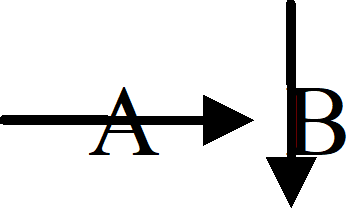

In [4]:
X = np.random.randint(0,5,(2,3))
Y = np.random.randint(0,5,(2,3))
result = X*Y
print(X)
print(Y)
print(result)

[[3 1 4]
 [0 3 4]]
[[1 0 3]
 [4 1 0]]
[[ 3  0 12]
 [ 0  3  0]]

The reason for using the former method, is that the former is required
for solving sets of equations.

## Adding and Subtracting Matrices

Adding or subtracting matrices is straightforward; simply add or
subtract corresponding elements. In Python, the multiplication requires
numpy function, but if the matrices are numpy variables, subtraction and
addition can be done with the normal operators.

In [5]:
import numpy as np

X = np.random.randint(0,100,(2,2))
Y = np.random.randint(0,100,(2,2))

# Addition of matrices
result_add = X + Y
print(X)
print(Y)
print(result_add)

[[69 21]
 [98 56]]
[[82 78]
 [20  1]]
[[151  99]
 [118  57]]

## Dividing with a Matrix

While direct division isn’t defined in matrix operations, we can achieve
a similar result by multiplying by the inverse of a matrix. The inverse
of a matrix $\mathbf{X}$, denoted $\mathbf{X}^{-1}$, satisfies:

$$
\mathbf{X} \times \mathbf{X}^{-1} = \mathbf{I} =
\begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}
$$

where $\mathbf{I}$ is the identity matrix. Multiplying any matrix by
$\mathbf{I}$ results in the original matrix, akin to multiplying any
number by 1.

In practice, while the concept is straightforward, the actual
calculation of a matrix inverse can become complex for larger matrices
and is typically handled by computers. We will not go through the method
of obtaining the inverse in this course, we will in stead just utilize
the numpy funciton for calculating the inverse. Specifically, we use
`np.linalg.inv(X)`. We can check that it actually complies with the
definition like this:

In [6]:
X = np.random.randint(0,10,(3,3))
# Calculating inverse of X
X_inv = np.linalg.inv(X)

# Testing
np.round(np.dot(X_inv, X),1)

## Solving Equations with Matrix Algebra

The foundation we’ve established for matrix algebra now allows us to
efficiently solve systems of equations. Consider solving the following
pair of simultaneous equations:

$$
x_{11}a_{1} + x_{12}a_{2} = b_{1} \\
x_{21}a_{1} + x_{22}a_{2} = b_{2}
$$

Here, we know the values of $x$ and $b$ but need to find the values of
$a$. These equations can be succinctly expressed using matrix notation:

$$
\mathbf{X \times a} = \mathbf{b}
$$

where $\mathbf{a}$ and $\mathbf{b}$ are column vectors. Let us define
the right hand side vector `b` and the coeficient matrix `X` randomly in
python as

In [7]:
b =  np.random.randint(0,100,(2,1))
# Define matrix X
X =  np.random.randint(0,100,(2,2))
print(X)
print(b)

[[55  9]
 [ 4  0]]
[[24]
 [77]]

To solve for $\mathbf{a}$, we use the inverse of $\mathbf{X}$, provided
it exists, and multiplies it with the left and right hand sides of the
equation, just as we would divide with X on both sides to solve for a
single equation:

$$
\mathbf{X}^{-1} \times \mathbf{X} \times \mathbf{a} = \mathbf{X}^{-1}\mathbf{b}
$$

Since we know that $\mathbf{X}^{-1}$ is the solution to
$\mathbf{X}^{-1} \times \mathbf{X} = \mathbf{I}$, premultiplying with
$\mathbf{X}^{-1}$ yields:

$$
\mathbf{a} = \mathbf{X}^{-1}\mathbf{b}
$$

Hence, we have found an easy way to solve any linear equation. We can
test that it works in python. Let us first find `a` using this approach:

In [8]:
a = np.dot(np.linalg.inv(X), b)
a

array([[  19.25      ],
       [-114.97222222]])

If you get a “Singular matrix” error its because we are generating `X`
with a few random integers, which sometimes creates unsolvable systems,
so just generate `X` and `b` again.

Now we can test, if the solution for a actually works, by applying it on
the original equation $\mathbf{X \times a} = \mathbf{b}$. This should
yield the right hand side of th equation, `b`:

In [9]:
np.dot(X, a)

array([[24.],
       [77.]])

Compare this with the actual `b`:

In [10]:
np.dot(X, a)

array([[24.],
       [77.]])

Thus, we have identified an effective method to solve any system of
equations, provided that $\mathbf{X}$ is invertible. If $\mathbf{X}$
cannot be inverted, it indicates that two or more equations are
essentially identical, leading to an “underdetermined” system. In such
cases, some equations are redundant, and there are not enough
independent equations to determine the values of all variables. Remember
the fundamental rule: we need an equal number of equations and unknowns
to uniquely solve for each variable.

## Transposing

Transposing a matrix involves swapping its rows and columns. For
example, a $2 \times 3$ matrix:

$$
\mathbf{X}_{2 \times 3} =
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23}
\end{pmatrix}
$$

transposes to:

$$
\mathbf{X}_{2 \times 3}^{\prime} =
\begin{pmatrix}
x_{11} & x_{21} \\
x_{12} & x_{22} \\
x_{13} & x_{23}
\end{pmatrix}
$$

where $^{\prime}$ denotes the transposed matrix. For a column vector
$\mathbf{a}$, transposing and then multiplying by itself,
$\mathbf{a}^{\prime}\mathbf{a}$, calculates the sum of squares of its
components.

In [11]:
# Example of matrix transposition
X_2x3 = np.random.randint(0,100,(2,3))
X_transposed = X_2x3.T
X_transposed

array([[90, 68],
       [65, 66],
       [43, 85]])

Transposition is often used to conform to the requirements of matrix
multiplication, where the number of columns in the first matrix must
match the number of rows in the second. If this is not the case, one
might transpose the first matrix to facilitate multiplication.

# Calculus and matrices

Deriving matrices follows similar principles to deriving polynomials.
For instance:

$$
\frac{d\left( a^{2} \sigma^{2} \right)}{da} = 2a \sigma^{2}
$$

applies to scalar variables, and for a matrix $\Sigma$ and a column
vector $\mathbf{a}$, we have:

$$
\frac{d\left(\mathbf{a}^{\prime}{\Sigma}\mathbf{a}\right)}{d\mathbf{a}^{\prime}} =2{\Sigma}\mathbf{a}
$$

assuming ${\Sigma}$ is symmetric. In practical terms, the derivative
with respect to `a` here, given some values for `a`, is

In [12]:
# Derivation with matrix and vector
a = np.random.randint(0,100,(2,1))
Sigma = np.random.randint(0,100,(2,2))

# Derivative of a' Sigma a with respect to a
derivative = 2 * np.dot(Sigma, a)
derivative

array([[13524],
       [10686]])

We can rewrite the matrix formulation in scalar form, to check that the
rule is correct. The scalar form of
$\mathbf{a}^{\prime} {\Sigma}\mathbf{a}$ is

$$
\mathbf{a}^{\prime} {\Sigma} \mathbf{a} = \sum_{j=0}^{N} a_j \left( \sum_{i=0}^{N} a_i \sigma_{ij} \right)
$$

You can verify that

$$
\frac{d(\mathbf{a}^{\prime} {\Sigma} \mathbf{a}) }{d\mathbf{a}}= 2 [\sum_{i=0}^{N} a_i \sigma_{i0}, ..., \sum_{i=0}^{N} a_i \sigma_{iN}]
$$

# Optimal portfolios with more than one asset

We remember from above the previous chapter that with one asset, the
optimal portfolio was

$$
a_{opt}=\frac{(\mu -r)}{\lambda \sigma^2}
$$

From this we concluded that:

1.  The more risk-averse the person is, the less they should invest.
2.  The larger the expected return of the asset, the more should be
    invested.
3.  The greater the risk associated with the asset, represented by
    $\sigma^2$, the less should be invested.

Now, let us consider the optimal investments if we have more than one
asset.

## Optimal Portfolios with Any Number of Assets

Let us now assume that the investor in the previous section has a
portfolio of $N$ assets, not just one. Their wealth next period,
assuming the entire amount is borrowed, is then expressed in matrix
notation as:

$$
W_1 = \mathbf{a}'\mathbf{x} - \mathbf{1}r
$$

where $\mathbf{a}$ represents the portfolio weights, $\mathbf{x}$
represents the returns, and $\mathbf{1}$ is a column vector of ones,
such that $\mathbf{1}r$ is a column vector of the risk-free interest
rate $r$. Recall from earlier that the investor aims to maximize the
difference between expected return and variance:

$$
\max_{\mathbf{a}} Z = \mathbb{E}W_1 - \lambda \frac{1}{2} \operatorname{var}(W_1)  
$$

$\mathbf{x}$ now is a column vector of many normally distributed
variables with different variances and expectations. We denote the
expected returns by $\mu_i$ for asset $i$, and the associated vector of
these returns by $\mathbf{\mu}$. Given a portfolio $\mathbf{a}$, the
expected return on the portfolio then becomes:

$$
\mathbb{E}W_1 = \mathbf{a}^{\prime}(\mathbb{E}\mathbf{x}-\mathbf{1}r) = \mathbf{a}^{\prime}({\mu} - \mathbf{1}r)
$$

For the variance, the risk free return $r$ is not relevant, since means
are subtracted anyway. We define the covariance matrix, all the
combinations of variance and covariance between the stocks as

$$
\operatorname{var}W_1 =  \mathbf{a}^{\prime}{\Sigma} \mathbf{a} = 
\mathbf{a}^{\prime}
\begin{bmatrix}
\sigma_00 & \sigma_12 & \cdots & \sigma_1N \\
\sigma_12 & \sigma_22 & \cdots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_1N & \cdots & \cdots & \sigma_{NN}
\end{bmatrix}
\mathbf{a}
$$

Where $\sigma_{ij}$ is the covariance between $i$ and $j$, and
$\sigma_i^2$ is the variance of asset $i$. This is the covariance
matrix, denoted by the capital sigma, ${\Sigma}$.

When a vector is normally distributed we write it as
$\mathbf{x} \sim N({\mu}, {\Sigma})$.

We have now derived expressions for $\mathbb{E}(W_1)$ and
$\operatorname{var}(W_1)$ using matrix notation. Building on the
concepts from the previous lecture, we can now formulate our portfolio
optimization problem as:

$$
\max_{\mathbf{a}} Z = \mathbf{a}^{\prime}({\mu} - \mathbf{1}r) - \lambda \frac{1}{2} \mathbf{a}^{\prime}{\Sigma}\mathbf{a}
$$

Taking the derivative with respect to $\mathbf{a}^{\prime}$ yields the
$N$ first order conditions:

$$
\frac{dZ}{d\mathbf{a}} = ({\mu} - \mathbf{1}r) - \lambda {\Sigma a} = 0
$$

Hence, in optimum:

$$
{\Sigma} \mathbf{a}= \frac{1}{\lambda}({\mu} - \mathbf{1}r)
$$

By premultiplying with the inverse of ${\Sigma}$, we obtain the optimal
portfolio:

$$
\mathbf{a_{opt}} = \frac{1}{\lambda} {\Sigma}^{-1}({\mu} - \mathbf{1}r)
$$

Note that this formula looks very similar to the formula for an optimal
portfolio with only one asset:

$$
a_{opt} = \frac{\mu - r}{\lambda \sigma^2}
$$

In general, we may draw the same conclusions as in the case of one
asset:

1.  The more risk-averse the person is (large $\lambda$), the less they
    should invest.
2.  The larger the expected return the asset has, the more should be
    invested.
3.  The more risk is associated with the asset, the less should be
    invested.

# Empirical example - optimal porfolio and the portfolio front

We will create an optimal portfolio and draw the “portfolio front” -
which are the smallest possible volatility of a set of assets, for all
return leves. We use the script feature of Titlon to fetch the data, and
storing it in `'output/stocks.df'`

In [13]:
import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                    user="user@name.com", 
                    password="passwordfromtitlon", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
    SELECT  * FROM `OSE`.`equity` 
    WHERE year(`Date`) >= 2016
    ORDER BY `Name`,`Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), 
      columns=[i[0] for i in crsr.description])
df



#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN,
# OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'output/stocks.df')

We now reload the data, and pick the four stocks  
1. has been traded at the first and last day of the sample 2. that are
most traded (sorted on sum of `Turnover`)

We can obtain that with this code:

In [14]:
import numpy as np
import pandas as pd

df = pd.read_pickle('output/stocks.df')
# Defining annual risk free rate. 
rf = df['NOWA_DayLnrate'].mean()*7

isin_with_first_date = df[df['Date'] == df['Date'].min()]['ISIN'].unique()
isin_with_last_date = df[df['Date'] == df['Date'].max()]['ISIN'].unique()
valid_isins = set(isin_with_first_date).intersection(isin_with_last_date)
df[df['ISIN'].isin(valid_isins)]

df['Name (ISIN)'] =df['Name'].str.upper() + '(' + df['ISIN'] + ')'

# keeping only the most traded shares
res = (
    df.groupby(['Name (ISIN)'])
    .agg({'Turnover': 'sum'})
    .sort_values(by='Turnover', ascending=False)
)
df = df.merge(res.head(4), on=['Name (ISIN)'], 
                how='inner')
res.head(4)

## The historic mean and covariance matrix

We will now calculate the covariance matrix and the mean vector. To
begin, we’ll create a function that reformats the data from its long
format (where stock prices are listed sequentially in a single column)
to a wide format. In this wide format, unique dates will be in the first
column, with subsequent columns containing prices for each stock.

In [15]:
def get_matrix(df, field):
    """Converts the df to a matrix df that can 
    be used to calculate the covariance matrix"""
    
    df['Date'] = pd.to_datetime(df['Date'])
    df_unique = df.drop_duplicates(
                  subset=['Date', 'ISIN'])
    pivot_df = df_unique.pivot(index='Date', 
                  columns='ISIN', 
                  values=field)

    pivot_df = pivot_df.dropna()

  # Annualized weekly returns
    df_weekly = pivot_df.resample('W').sum()

    return df_weekly

#X is a matrxi with e
X = get_matrix(df, 'lnDeltaP') 
X.sort_index()

256 rows × 3 columns

Wit this data, it is relatively easy to calculate covariance and the
means vector

In [16]:
# Converting X to a numpy array:
X = np.array(X)

# Calculating the covariance
cov_matrix = np.cov(X, rowvar=False)

# Calculating the means vector, and reshaping it to a 
# column vector. 

means = np.mean(X, axis=0).reshape((X.shape[1],1))

## Plotting the portfolio front

We now turn to portfolio front. The portfolio front represents the
volatility of the portfolio with the least variance, for a given
portfolio return. Hence, we want a function of portfolio return that
represent the minimum variance portfolios.

It turns out that by defining a few simple scalars, there is a
reasonably simple expression for the set of minimum variance portfolios.
The scalars are:

$$
A = \mathbf{1}^{\prime}{\Sigma}^{-1}\mathbf{1}
$$

$$
B = \mathbf{1}^{\prime}{\Sigma}^{-1}{\mu-\mathbf{1}r}
$$

$$
C = {\mu-\mathbf{1}r}^{\prime}{\Sigma}^{-1}{\mu-\mathbf{1}r}
$$

With these definition, the portfolio front, representing all minimum
variance portfolios for a given expected return and a total investment
of 1, is

$$
{sigma}_{opt} =\frac{1}{A}+\frac{ \left(\mu_{opt}-\frac{B}{A}\right)^2}{C-\frac{B^2}{A}} 
$$ where $\mu_{opt}={\mu}^{\prime}\mathbf{a}$

This formula automatically ensures that the sum of all the portfolio
weights are 1. Now, let us define these variables, and the function. A,
B and C in python:

In [17]:
ones = np.ones((len(means),1))

A = np.dot(ones.T, 
    np.dot(np.linalg.inv(cov_matrix), ones))[0][0]

B = np.dot(ones.T, 
      np.dot(np.linalg.inv(cov_matrix), 
      (means-rf)))[0][0]

C = np.dot((means.T-rf), 
      np.dot(np.linalg.inv(cov_matrix), 
      (means-rf)))[0][0]

The portfolio front function, that returns the volatility associated
with the minimum variance portfolio for a given `expected_excess_return`
can then be defined as:

In [18]:
def portfolio_front(expected_excess_return):
  r = expected_excess_return
  minimum_variance = (1/A 
          + ((r - abs(B)/A)**2) / (C - B**2/A))
  minimum_volatility = minimum_variance**0.5
  return minimum_volatility

Let us plot this

With a defined portfolio frontier function, we can now plot the
portfolio frontier. To make the weekly returns comparable on an annual
scale, we multiply them by a scaling factor, `plot_scale`, set to 52. We
can simply multiply the returns, because returns in Titlon are
conveniently defined as log returns, calculated as
$\log(x_{t}) - \log(x_{t-1})$, rather than the typical relative return
$\frac{x_{t} - x_{t-1}}{x_{t-1}}$.

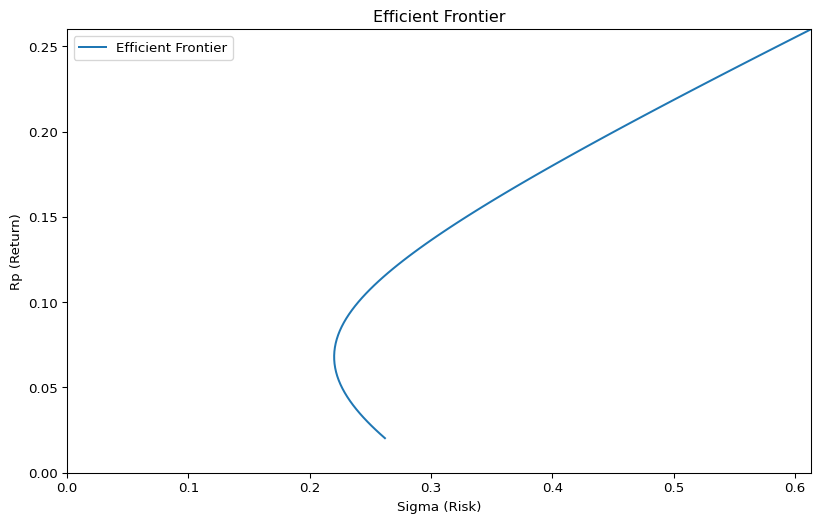

In [19]:
from matplotlib import pyplot as plt
#Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_scale = 52
MAX_AXIS = 0.005
#applying the function
rp_values = np.linspace(0, MAX_AXIS-rf, 100)
sigma_values = portfolio_front(rp_values)

#plotting, after annualizing the weekly data
ax.plot(plot_scale**0.5*(sigma_values), plot_scale*(rp_values+rf), 
            label='Efficient Frontier')

#plot settings:
ax.set_xlim([0, np.max(sigma_values*plot_scale**0.5)])
ax.set_ylim([0, (np.max(rp_values)+rf)*plot_scale])
ax.set_xlabel('Sigma (Risk)')
ax.set_ylabel('Rp (Return)')
ax.set_title('Efficient Frontier')
ax.legend()

A key advantage of using log returns is that they account for symmetry
in gains and losses. For example, with relative returns, a 10% gain
followed by a 10% loss results in a net loss of 1%. However, with log
returns, a 10% gain and a 10% loss precisely offset each other, leaving
you with no net change from the starting point.

Let us now add the point for the optimal portfolio. The optimal
portfolio is

$$
\mathbf{a}_{opt} = \frac{1}{\lambda}{\Sigma}^{-1}({\mu} - \mathbf{1}r)
$$

The total cost of this portfolio is

$$
\mathbf{1}^{\prime}\mathbf{a}_{opt} = \frac{1}{\lambda} \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)
$$

So the normalized portfolio is

$$
\mathbf{a}_{norm}  = \frac{ {\Sigma}^{-1}({\mu} - \mathbf{1}r) }
{ \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)} 
$$

The expected return of the optimal portfolio on the frontier, is then

$$
\mu_{port}=({\mu} - \mathbf{1}r)^{\prime}\mathbf{a_{norm}}  = \frac{({\mu} - \mathbf{1}r)^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)}{ \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)} 
$$

Which is simply, according to the previous definitions of B and C: $$
\mu_{port}=\frac{C}{B}
$$

Let us add that to the plot

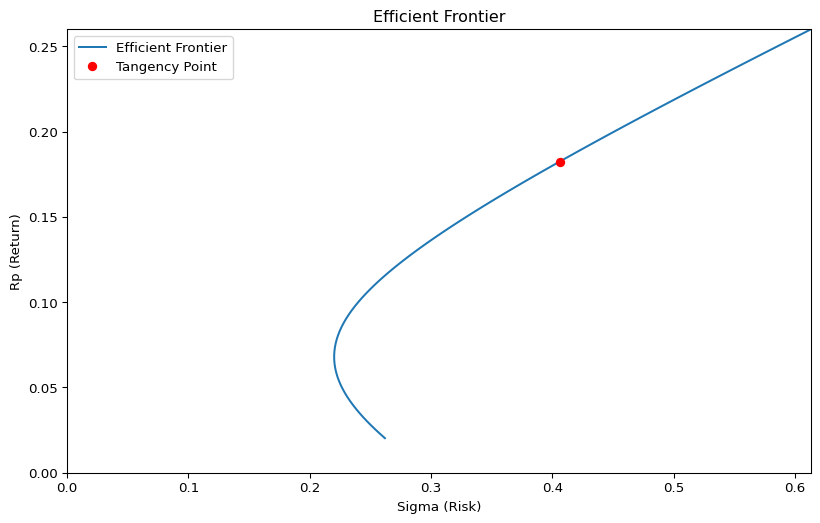

In [20]:
# Calculating the tangency point of the normalized 
# optimal portfolio
tangency_sigma =  portfolio_front(C/B)

#plotting it, after annualizing the weekly data
ax.plot(plot_scale**0.5*tangency_sigma, 
          plot_scale*(C/B + rf), 
          'ro',label='Tangency Point')
ax.legend()
fig

Let us now draw a tangency line from the risk free interest rate `rf` to
the optimal portfolio point. The slope will be the Sharp-ratio

$$
S=\frac{C/B}{f(C/B)}
$$

where $f(C/B)$ is the portfolio front function `portfolio_front(C/B)` at
`C/B`

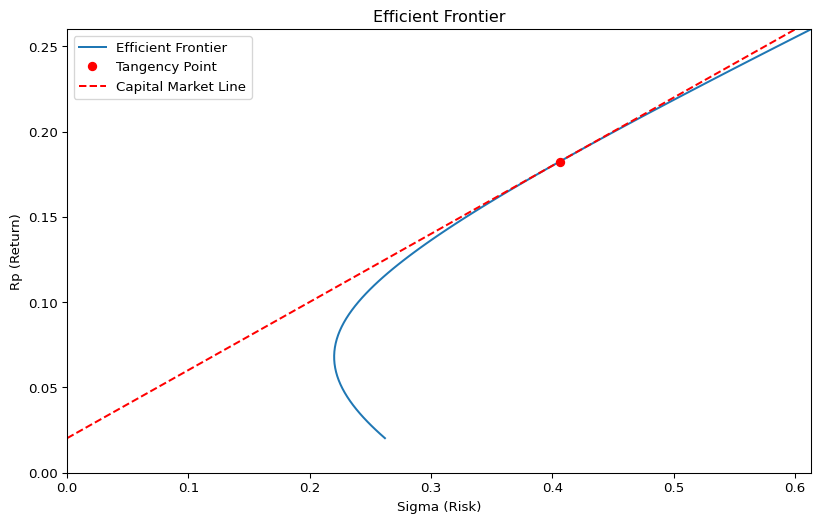

In [21]:
import pickle #For saving the plot

sigma_range = np.linspace(0, np.max(sigma_values), 100)

# Plotting the portfolio front, after annualizing the 
# weekly data
ax.plot(plot_scale**0.5*sigma_range, plot_scale*(rf 
        + sigma_range*(C/B)/tangency_sigma), 
        color='r', linestyle='--', 
        label='Capital Market Line')

ax.legend()

fig

***Coding Challenges:***

-   **Challenge 1**: Obtain a three or four return series for
    portfolios, for example your portfolio, the market portfolio and the
    factors at titlon and calculate the variance-covariance matrix and
    the means

-   **Challenge 2**: Use your calculated covariance matrix and means,
    and the code provided above, to draw a portfolio front.

-   **Challenge 3**: Use the same information to plot the points of each
    portfolio in the same chart.

-   **Challenge 4**: Calculate the optimal portfolio and place it in the
    chart, together with the capital market line

# Factors

Factors are portfolios constructed based on specific characteristics of
assets. For example, Fama and French proposed factors based on company
valuation (over- or under-valuation) and company size.

## Construction of Factors

A standard, simplified method for constructing a factor portfolio
involves creating a long position in the third of assets with the
strongest characteristic (e.g., the most undervalued) and a short
position in the third with the weakest. For instance, the **HML** (High
Minus Low) factor by Fama and French takes a long position in the top
third of companies with the highest market-to-book value and shorts the
bottom third with the lowest.

This results in a portfolio with zero net cost because the long and
short positions offset each other. Hence, there’s no need to subtract
the risk-free rate when calculating returns for factor portfolios.

In Titlon, there are four factors: **SMB**, **HML**, **LIQ**, and
**MOM**, alongside the market factor (the market index).

-   **SMB (Small Minus Big):** The return of small companies minus the
    return of large companies.
-   **HML (High Minus Low):** The return of companies with high
    market-to-book ratios compared to those with low ratios.
-   **LIQ (Liquidity):** The return of the most liquid companies minus
    that of the least liquid.
-   **MOM (Momentum):** The return of companies with high momentum minus
    those with high reversal tendencies.

## Factor Model

The main purpose of factors is to be used in regression analysis, like
the following:

$$
\begin{array}{rl}
x - r_f = \alpha + \beta_M (r_M - r_f)  \\
+\beta_{SMB} \cdot SMB \\
+\beta_{HML} \cdot HML 
+\beta_{LIQ} \cdot LIQ \\
+\beta_{MOM} \cdot MOM
 + \epsilon
\end{array}
$$

This is a multifactor model. If we only include the market factor, the
model reduces to the well-known **CAPM** (Capital Asset Pricing Model).
Adding the additional factors results in a more comprehensive **factor
model**.

## Factors in Portfolio Evaluation

Numerous factors have been proposed in the literature. However, many are
believed to be the result of data mining, so it’s common practice to use
only the most established ones, like those mentioned above, when
evaluating portfolio performance.

The estimated $\alpha$ from the factor model is the most widely
recognized measure of risk-adjusted return. A positive $\alpha$
indicates that a portion of the excess return of $x - r_f$ cannot be
explained by exposure to any of the factors, including the market
factor. This implies that the portfolio has delivered some form of
risk-free excess return.

As in any regression, you can compute the standard error and p-value of
the estimated $\alpha$. This is crucial because, if the $\alpha$ is not
statistically significant, we cannot confidently conclude that it is
different from zero. Therefore, to claim that an asset or portfolio has
truly outperformed the market, its multifactor $\alpha$ should be both
positive and statistically significant.

## Historical Context

This framework is the standard method for determining whether a
portfolio manager has genuinely been skilled or simply benefited from
luck or factor exposures.

The field of finance has, in many ways, been driven by the need to
explain portfolio managers’ overperformance. In the early 20th century,
some managers appeared to consistently outperform the market. The
development of **CAPM** revealed that this was often due to selecting
stocks with high market risk rather than genuine skill. Most of these
managers did not generate CAPM alpha.

For investors seeking higher returns by taking on more market risk,
simply buying more shares (increasing exposure to the market) is
typically more cost-effective than picking the riskiest stocks. The
development of CAPM helped investors make more informed choices.

Similarly, the introduction of factor models showed that some managers
were merely betting on small-cap stocks or undervalued companies to
generate excess returns. When accounting for these factors, much of the
supposed excess return often disappears.

### Coding Challenges:

-   **Challenge 1**:
    -   Download stock data from Titlon for a single stock.
    -   Perform a multifactor regression model using the downloaded
        data.
    -   Analyze the significance of the alpha: check whether it is
        statistically significant, and interpret its direction (positive
        or negative).
    -   Provide commentary on what the result implies in terms of the
        stock’s performance relative to the factors.
-   **Challenge 2**:
    -   Download factor data from Titlon and plot the performance of
        these factors alongside the optimal portfolio from the previous
        chapter.
    -   Add each factor as a data point on the chart, allowing
        comparison between the factors and the optimal portfolio as well
        as the portfolio frontier.
    -   Use the following SQL query in the Titlon script to retrieve the
        factor data:

    ``` sql
    SELECT [SMB],[HML],[LIQ],[MOM]
      FROM [OSE].[dbo].[factors]
      WHERE YEAR([Date]) >= 2016
    ```

    -   Plot the performance and visually assess how each factor
        performs relative to the optimal portfolio.

### Attemted answer to Challenge 2:

We first download the factor data from titlon

In [22]:
import pandas as pd
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                user      = "esi000@uit.no",
                password  = "%VccvGWz5UjtT9sAuU7og",
                database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
    SELECT  *
    FROM `OSE`.`factors` 
    WHERE year(`Date`) >= 2016
    ORDER BY `Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), 
      columns=[i[0] for i in crsr.description])
df


#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN,
# OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

pd.to_pickle(df,'output/factors.df')

We then calculated the means and standard errors, after reducing the
frequency from daily to weekly.

In [23]:
import pandas as pd

df = pd.read_pickle('output/factors.df')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df_weekly = df.resample('W').sum()
df_weekly = df_weekly[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
df = df[['SMB', 'HML', 'LIQ', 'MOM']].dropna()
means = df_weekly.mean()*52
std = df_weekly.std()*52**0.5
print(std)
print(means)
df_weekly

SMB    0.145195
HML    0.193652
LIQ    0.160615
MOM    0.216708
dtype: float64
SMB    0.074676
HML    0.145056
LIQ    0.019353
MOM    0.164041
dtype: float64

431 rows × 4 columns

We can then plot the factors in the existing porfolio frontier

In [24]:
#load the previoiusly created portfolio front

for series in means.index:
    ax.scatter(std[series], means[series], label=series)

ax.legend()

fig

Can you construct the optimal portfolio of the stocks and the factors?